In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from inline_tensorboard import show_graph
from IPython.display import Image

In [2]:
sess = tf.InteractiveSession()

# Placeholders

Every placeholder must have a type.

In [3]:
x = tf.placeholder(tf.float32)
y = tf.identity(x)

In [4]:
y.eval(feed_dict={x: 1})

1.0

In [5]:
y.eval(feed_dict={x: np.array([[1, 0],
                               [0, 1]])})

array([[ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

You can also specify a shape to which they must conform.

In [6]:
x = tf.placeholder(tf.float32, shape=tf.TensorShape([2, 2]))
y = tf.identity(x)

In [7]:
y.eval(feed_dict={x: np.array([[1, 0],
                               [0, 1]])})

array([[ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [8]:
try:
    y.eval(feed_dict={x: np.array([[1, 0]])})
except ValueError as e:
    print e

Cannot feed value of shape (1, 2) for Tensor u'Placeholder_1:0', which has shape '(2, 2)'


You can leave the shape partially specified.

In [9]:
x = tf.placeholder(tf.float32, shape=tf.TensorShape([None, 2]))
y = tf.identity(x)

In [10]:
y.eval(feed_dict={x: np.array([[1, 0],
                               [0, 1]])})

array([[ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [11]:
y.eval(feed_dict={x: np.array([[1, 0]])})

array([[ 1.,  0.]], dtype=float32)

In [12]:
try:
    y.eval(feed_dict={x: np.array([[1],
                                   [0]])})
except ValueError as e:
    print e

Cannot feed value of shape (2, 1) for Tensor u'Placeholder_2:0', which has shape '(?, 2)'


# Variables

In [13]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [14]:
x = tf.Variable(np.eye(2))

All variables must be initialized.

In [15]:
x.initializer.run()

Once initialized, they do not need to be supplied.

In [16]:
x.eval()

array([[ 1.,  0.],
       [ 0.,  1.]])

Variables can be updated!

In [17]:
tf.assign(x, 2 * x).eval()

array([[ 2.,  0.],
       [ 0.,  2.]])

Once again, you need not supply any inputs.

In [18]:
x.eval()

array([[ 2.,  0.],
       [ 0.,  2.]])

# Computation Graphs

In [19]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [20]:
a = tf.placeholder(tf.int32, name='a')
b = tf.placeholder(tf.int32, name='b')

In [21]:
result = tf.add(a, b, name='result')

In [22]:
show_graph(tf.get_default_graph().as_graph_def())

In [23]:
result.eval({a: 1, b: 2})

3

In [24]:
vector_a = np.array([1, 2, 3, 4, 5])
vector_b = np.array([1, 0, 1, 0, 1])

result.eval({a: vector_a, b: vector_b})

array([2, 2, 4, 4, 6], dtype=int32)

In [25]:
matrix_a = np.eye(2).astype(np.int32)
print matrix_a

[[1 0]
 [0 1]]


In [26]:
matrix_b = np.eye(2).astype(np.int32) * -1
print matrix_b

[[-1  0]
 [ 0 -1]]


In [27]:
print result.eval({a: matrix_a, b: matrix_b})

[[0 0]
 [0 0]]


# Concise tensor operators

In [28]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [29]:
a = tf.placeholder(tf.int32, name='a')
b = tf.placeholder(tf.int32, name='b')

result = a + b

In [30]:
result.eval({a: 1, b: 2})

3

# Optimization

Variables are "trainable"!

In [31]:
x = tf.Variable(1000., dtype=tf.float32)
x.initializer.run()

In [32]:
objective_function = x ** 2

In [33]:
objective_function.eval()

1000000.0

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
optimize  = optimizer.minimize(objective_function)

In [35]:
history = []

for _ in range(100):
    optimize.run()
    history.append(x.eval())

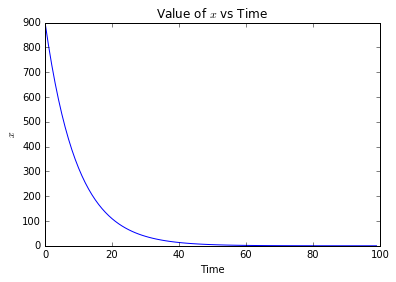

In [36]:
plt.plot(range(len(history)), history)
plt.xlabel('Time')
plt.ylabel('$x$')
plt.title('Value of $x$ vs Time')
plt.show()

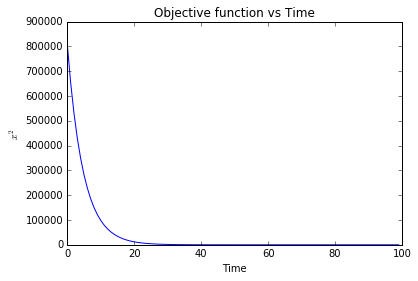

In [37]:
plt.plot(range(len(history)), np.array(history) ** 2)
plt.xlabel('Time')
plt.ylabel('$x^2$')
plt.title('Objective function vs Time')
plt.show()

In [38]:
print x.eval()

0.0265614


Other optimizers are available:

1. tf.train.AdadeltaOptimizer
2. tf.train.AdagradOptimizer
3. tf.train.AdagradDAOptimizer
4. tf.train.MomentumOptimizer
5. **tf.train.AdamOptimizer** &ndash; recommended, default parameters work great for many tasks!
6. tf.train.FtrlOptimizer
7. tf.train.ProximalGradientDescentOptimizer
8. tf.train.ProximalAdagradOptimizer
9. tf.train.RMSPropOptimizer